In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow

In [ ]:
tensorflow.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [ ]:
# 이미지 처리
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
# 파일 존재 여부 확인용
import os

In [ ]:
# 모델
from tensorflow import keras

# 변수 목록

In [ ]:
train_dir_name = "./Dataset/Train-Validation_Binary/Train/"
val_dir_name = "./Dataset/Train-Validation_Binary/Validation/"

img_width = 200
img_height = 200

model_dir_name = './Model/' # 학습 모델이 저장될 디렉토리명

In [ ]:
os.chdir('/content/drive/MyDrive/[perst]데이터셋/MachineLearningProject/01_Cloth Detection Model')

In [ ]:
os.getcwd()

'/content/drive/.shortcut-targets-by-id/1IE_8n95r-2qLINUcooIi9SdGkw55753B/[perst]데이터셋/MachineLearningProject/01_Cloth Detection Model'

In [ ]:
os.path.isdir(train_dir_name[:-1])

True

## 모델 이름은 안바꿔주면 이전 모델에 덮어쓰기되니까 잊지말고 꼭 바꿔주자

In [ ]:
model_path = model_dir_name + 'binary_poly_seg_model_0113_01.keras'

# Train 데이터와 Validation 데이터 불러오기

In [ ]:
x_train = []
y_train = []

for i in range(0, 8001):
    img_path = train_dir_name + "Image/" + str(i) + ".jpg"
    label_path = train_dir_name + "Annotation/" + str(i) + ".png"

    if not os.path.isfile(img_path):
        continue
    if not os.path.isfile(label_path):
        continue

    # 이미지 파일 로드
    img_file = cv2.imread(img_path)
    if img_file is None:
        print(str(i) + ".jpg File Load Failed!!")
        break

    # 라벨링 파일 로드
    label_file = np.asarray(Image.open(label_path))
    if label_file is None:
        print(str(i) + ".png File Load Failed!!")

    x_train.append(img_file)
    y_train.append(label_file)


    if len(y_train)%500 == 0: # 진행도 확인용
        print(str(len(y_train)) + "개 파일 읽기 완료")


print("Complete")


500개 파일 읽기 완료
1000개 파일 읽기 완료
1500개 파일 읽기 완료
2000개 파일 읽기 완료
2500개 파일 읽기 완료
3000개 파일 읽기 완료
3500개 파일 읽기 완료
4000개 파일 읽기 완료
4500개 파일 읽기 완료
5000개 파일 읽기 완료
5500개 파일 읽기 완료
6000개 파일 읽기 완료
6500개 파일 읽기 완료
7000개 파일 읽기 완료
7500개 파일 읽기 완료
8000개 파일 읽기 완료
Complete


In [ ]:
x_val = []
y_val = []

for i in range(0, 2001):
    img_path = val_dir_name + "Image/" + str(i) + ".jpg"
    label_path = val_dir_name + "Annotation/" + str(i) + ".png"

    if not os.path.isfile(img_path):
        continue
    if not os.path.isfile(label_path):
        continue

    # 이미지 파일 로드
    img_file = cv2.imread(img_path)
    if img_file is None:
        print(str(i) + ".jpg File Load Failed!!")
        break

    # 라벨링 파일 로드
    label_file = np.asarray(Image.open(label_path))
    if label_file is None:
        print(str(i) + ".png File Load Failed!!")

    x_val.append(img_file)
    y_val.append(label_file)


    if len(y_val)%500 == 0: # 진행도 확인용
        print(str(len(y_val)) + "개 파일 읽기 완료")


print("Complete")


500개 파일 읽기 완료
1000개 파일 읽기 완료
1500개 파일 읽기 완료
2000개 파일 읽기 완료
Complete


In [ ]:
x_train = np.array(x_train)
x_train.shape

(8000, 200, 200, 3)

In [ ]:
y_train = np.array(y_train)
y_train.shape

(8000, 200, 200)

In [ ]:
x_val = np.array(x_val)
x_val.shape

(2000, 200, 200, 3)

In [ ]:
y_val = np.array(y_val)
y_val.shape

(2000, 200, 200)

In [ ]:
plt.imshow(x_train[0])
plt.show()

In [ ]:
plt.imshow(y_train[0])
plt.show()

In [ ]:
plt.imshow(x_val[0])
plt.show()

In [ ]:
plt.imshow(y_val[0])
plt.show()

# 모델 생성

In [ ]:
input_img = keras.layers.Input(shape=(img_height, img_width, 3))

conv1 = keras.layers.Conv2D(filters=32, kernel_size=5, padding='same', activation='relu')(input_img)
conv1 = keras.layers.Dropout(0.3)(conv1)
conv1 = keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(conv1)
pool1 = keras.layers.MaxPooling2D(2)(conv1)

conv2 = keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(pool1)
conv2 = keras.layers.Dropout(0.3)(conv2)
conv2 = keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(conv2)
pool2 = keras.layers.MaxPooling2D(2)(conv2)

conv3 = keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(pool2)
conv3 = keras.layers.Dropout(0.4)(conv3)
conv3 = keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(conv3)
pool3 = keras.layers.MaxPooling2D(2)(conv3)

conv4 = keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(pool3)
conv4 = keras.layers.Dropout(0.4)(conv4)

up1 = keras.layers.concatenate([keras.layers.UpSampling2D(2)(conv4), conv3], axis=-1)
conv5 = keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(up1)
conv5 = keras.layers.Dropout(0.3)(conv5)
conv5 = keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(conv5)

up2 = keras.layers.concatenate([keras.layers.UpSampling2D(2)(conv5), conv2], axis=-1)
conv6 = keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(up2)
conv6 = keras.layers.Dropout(0.3)(conv6)
conv6 = keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(conv6)

up3 = keras.layers.concatenate([keras.layers.UpSampling2D(2)(conv6), conv1], axis=-1)
conv7 = keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(up3)
conv7 = keras.layers.Dropout(0.3)(conv7)
conv7 = keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(conv7)

output_img = keras.layers.Conv2D(filters=1, kernel_size=1, padding='same', activation='sigmoid', name='OutputLayer')(conv7)


poly_seg_model = keras.Model(input_img, output_img)
adam = keras.optimizers.Adam(learning_rate=0.0003)
poly_seg_model.compile(optimizer=adam, loss='binary_crossentropy', metrics=[keras.metrics.BinaryAccuracy()])

In [ ]:
poly_seg_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 200, 200, 32)         2432      ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 200, 200, 32)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 200, 200, 32)         9248      ['dropout[0][0]']             
                                                                                              

# 모델 학습

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint(model_path, save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

In [ ]:
history = poly_seg_model.fit(x_train, y_train,
                             epochs=50, verbose=1,
                             validation_data=(x_val, y_val),
                             callbacks=[checkpoint_cb, early_stopping_cb])

print()
print("Complete")

Epoch 1/50
250/250 [==============================] - 39s 63ms/step - loss: 0.5237 - binary_accuracy: 0.8162 - val_loss: 0.3719 - val_binary_accuracy: 0.8505
Epoch 2/50
250/250 [==============================] - 14s 58ms/step - loss: 0.2683 - binary_accuracy: 0.8872 - val_loss: 0.3558 - val_binary_accuracy: 0.8637
Epoch 3/50
250/250 [==============================] - 14s 58ms/step - loss: 0.2414 - binary_accuracy: 0.8991 - val_loss: 0.2649 - val_binary_accuracy: 0.8955
Epoch 4/50
250/250 [==============================] - 14s 58ms/step - loss: 0.2320 - binary_accuracy: 0.9033 - val_loss: 0.2645 - val_binary_accuracy: 0.8957
Epoch 5/50
250/250 [==============================] - 14s 58ms/step - loss: 0.2173 - binary_accuracy: 0.9096 - val_loss: 0.2539 - val_binary_accuracy: 0.9035
Epoch 6/50
250/250 [==============================] - 14s 57ms/step - loss: 0.2090 - binary_accuracy: 0.9135 - val_loss: 0.2790 - val_binary_accuracy: 0.8856
Epoch 7/50
250/250 [==============================] 

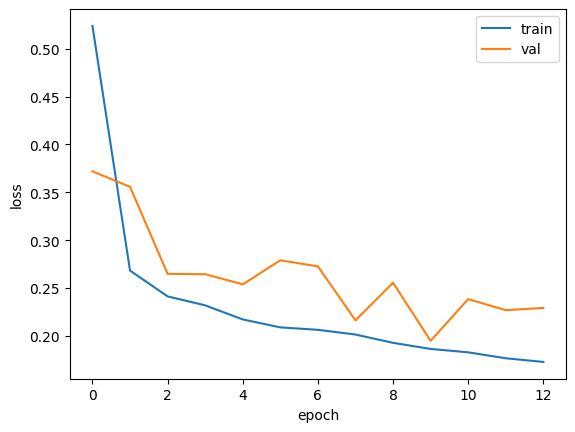

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 모델 테스트

## Validation 데이터 일부의 predict 결과 확인

In [ ]:
saved_model_path = model_dir_name + 'binary_poly_seg_model_0113_01.keras'

saved_model = keras.models.load_model(saved_model_path)

In [ ]:
saved_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 200, 200, 32)         2432      ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 200, 200, 32)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 200, 200, 32)         9248      ['dropout[0][0]']             
                                                                                              

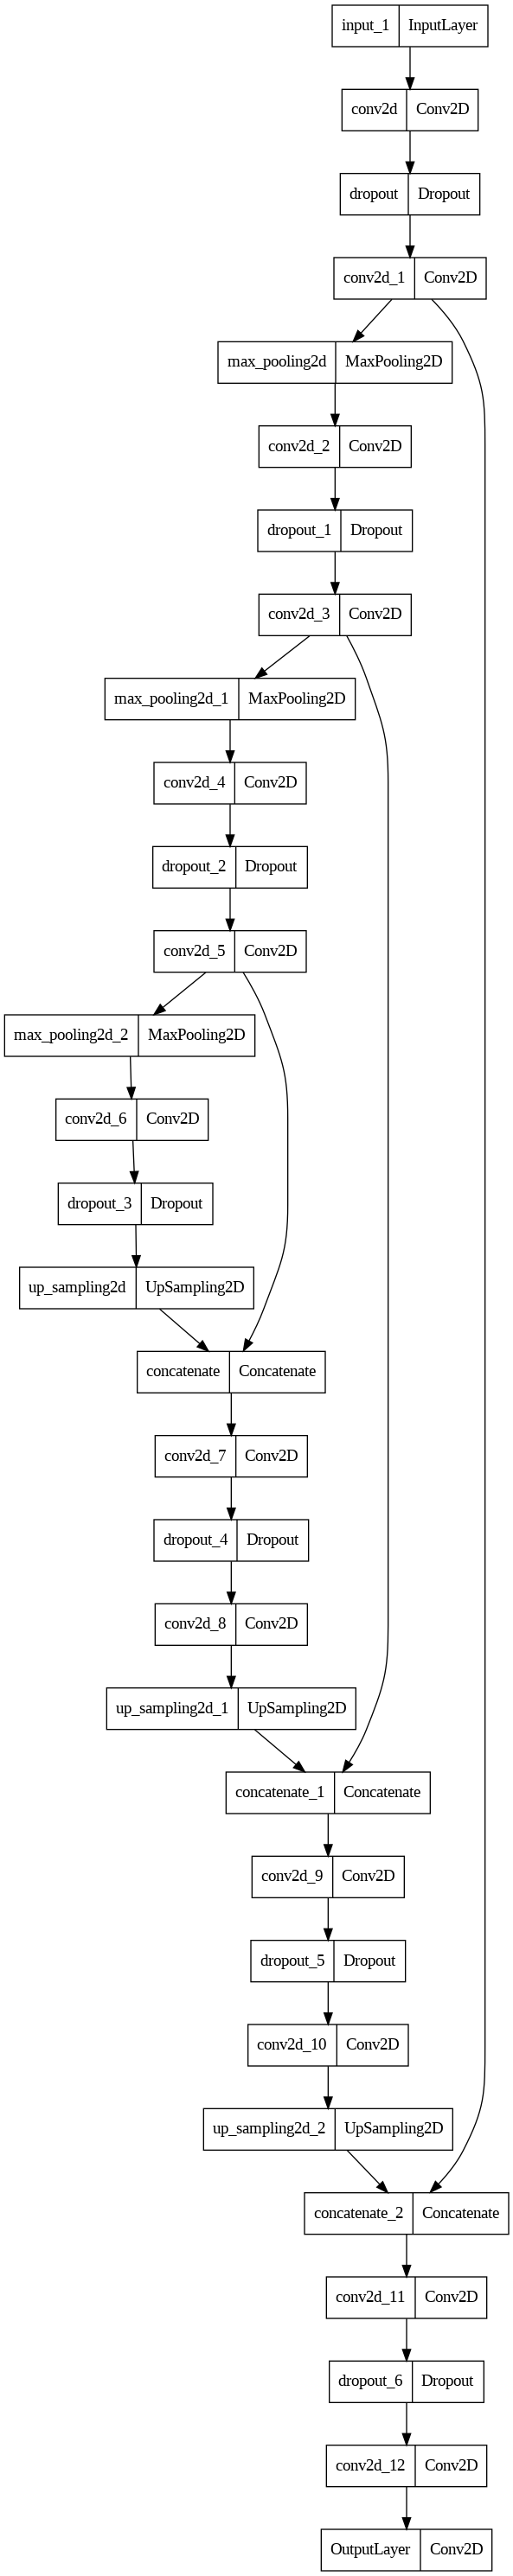

In [ ]:
keras.utils.plot_model(saved_model)

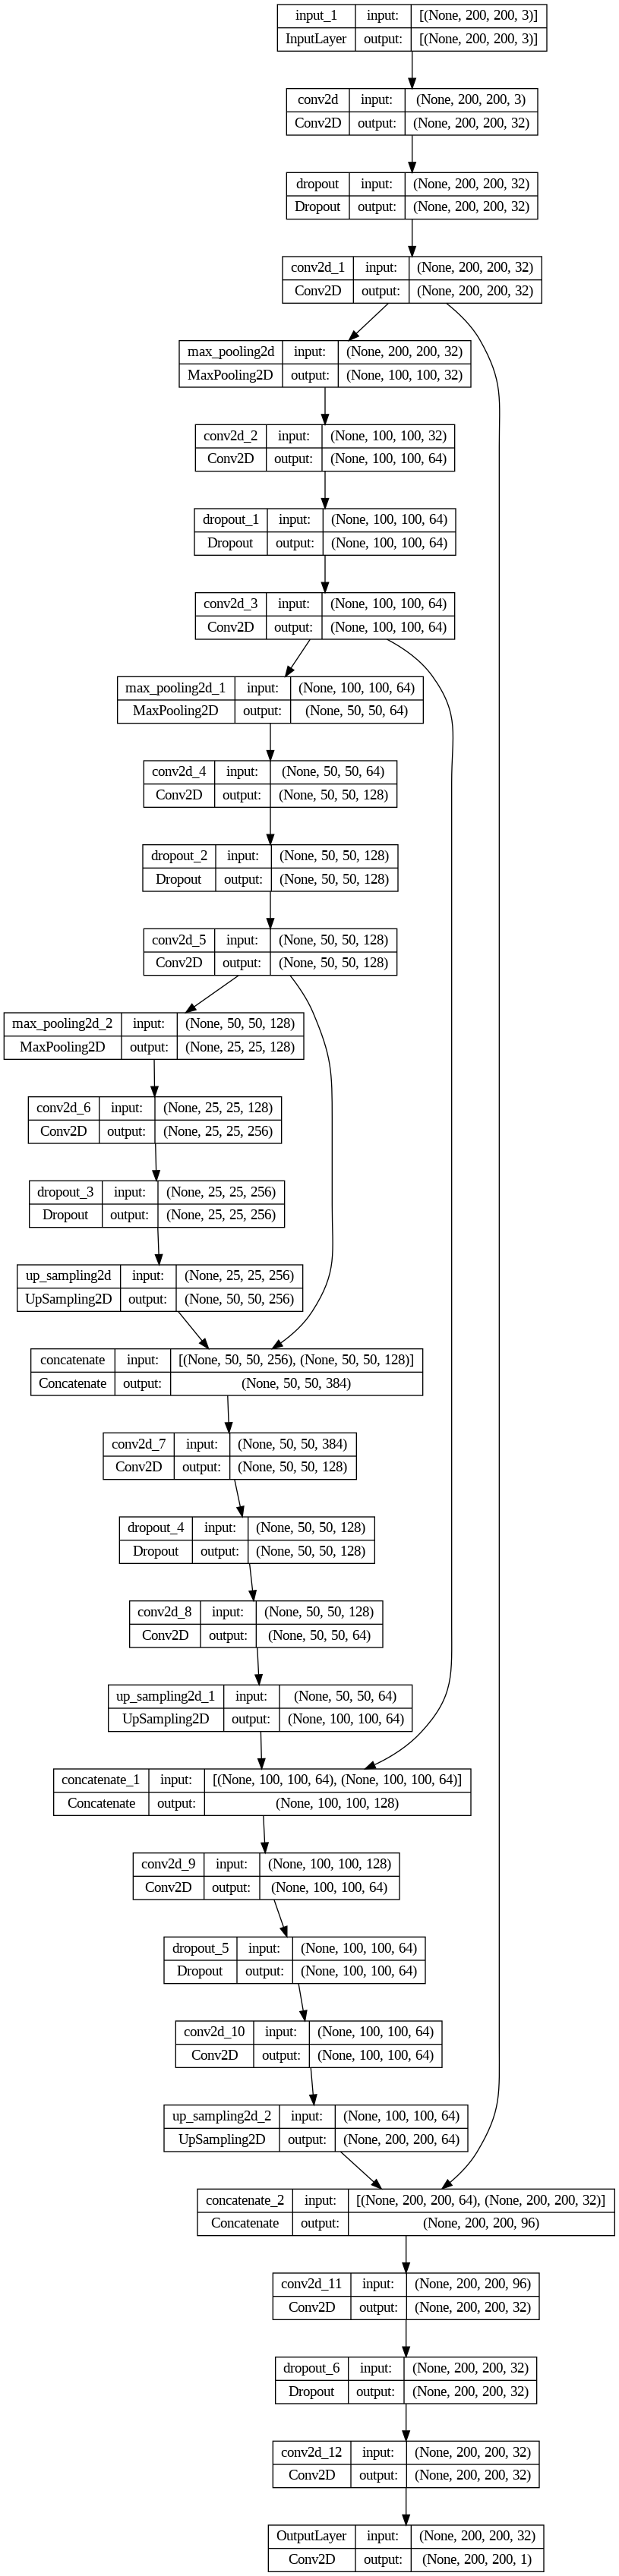

In [ ]:
keras.utils.plot_model(saved_model, show_shapes=True)

In [ ]:
preds = saved_model.predict(x_val[0:1])
type(preds)

1/1 [==============================] - 1s 596ms/step


numpy.ndarray

In [ ]:
preds.shape

(1, 200, 200, 1)

In [ ]:
pred_mask = np.ndarray.round(preds[0])
pred_mask.shape

(200, 200, 1)

In [ ]:
np.unique(pred_mask)

array([0., 1.], dtype=float32)

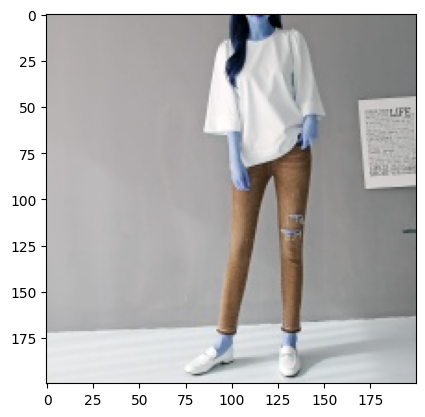

In [ ]:
plt.imshow(x_val[0])
plt.show()

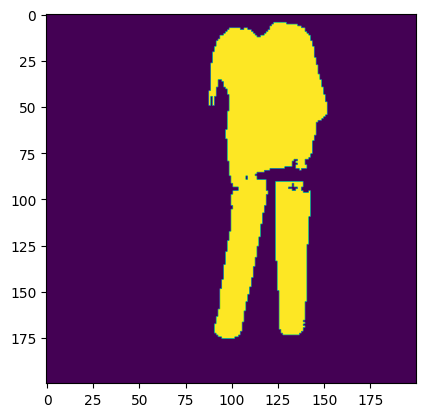

In [ ]:
plt.imshow(pred_mask)
plt.show()

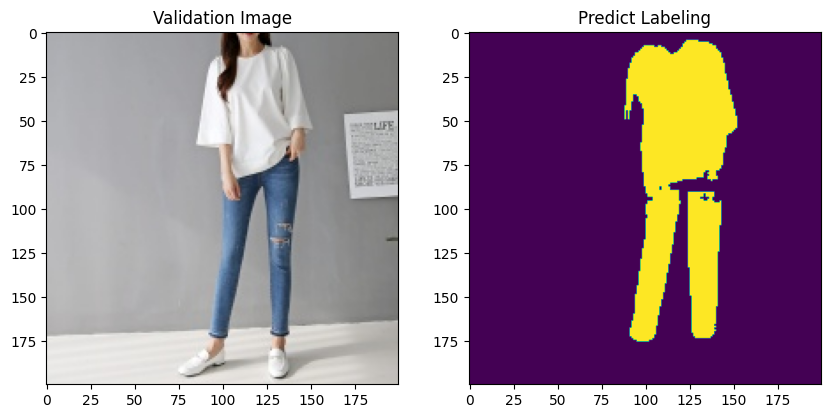

In [ ]:
x_val_rgb = cv2.cvtColor(x_val[0], cv2.COLOR_BGR2RGB) # RGB를 RGB 색공간으로 변경

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(x_val_rgb)
plt.title("Validation Image")

plt.subplot(1, 2, 2)
plt.imshow(pred_mask)
plt.title("Predict Labeling")

plt.show()

In [ ]:
acc = keras.metrics.BinaryAccuracy()
acc.reset_state()
acc.update_state(pred_mask, y_val[0:1])
acc.result().numpy()

0.7185063

In [ ]:
 saved_model.evaluate(x_val, y_val)

63/63 [==============================] - 1s 18ms/step - loss: 0.1482 - binary_accuracy: 0.9415


[0.14818482100963593, 0.9414647221565247]

## 남성 모델 이미지의 predict 결과 확인

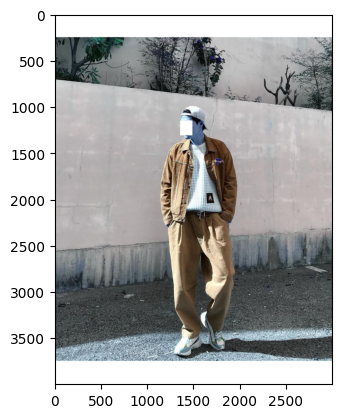

In [ ]:
man_img_path = '/content/drive/MyDrive/[perst]데이터셋/010.연도별 패션 선호도 파악 및 추천 데이터/01-1.정식개방데이터/Training/01.원천데이터/2019/T_00003_19_normcore_M.jpg'

man_img = cv2.imread(man_img_path)
if man_img is None:
    print('Image File Load Failed!!')
else:
    plt.imshow(man_img)
    plt.show()

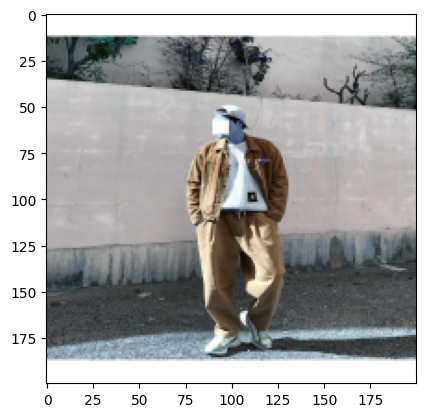

In [ ]:
man_img_resize = cv2.resize(man_img, dsize=(img_height, img_width), interpolation=cv2.INTER_AREA)
plt.imshow(man_img_resize)
plt.show()

In [ ]:
man_img_res_array = np.array([man_img_resize])
man_img_res_array.shape

(1, 200, 200, 3)

In [ ]:
preds = saved_model.predict(man_img_res_array[:])
type(preds)

In [ ]:
preds.shape

In [ ]:
pred_mask = np.ndarray.round(preds[0])
pred_mask.shape

In [ ]:
np.unique(pred_mask)

In [ ]:
plt.imshow(pred_mask)
plt.show()

In [ ]:
man_img_resize_rgb = cv2.cvtColor(man_img_resize, cv2.COLOR_BGR2RGB) # RGB를 RGB 색공간으로 변경

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(man_img_resize_rgb)
plt.title("New Test Image")

plt.subplot(1, 2, 2)
plt.imshow(pred_mask)
plt.title("Predict Labeling")

plt.show()